In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset='/content/drive/MyDrive/ML/50_Startups.xlsx'
import pandas as pd
df=pd.read_excel(dataset)

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.shape

(50, 5)

In [6]:
len(df)

50

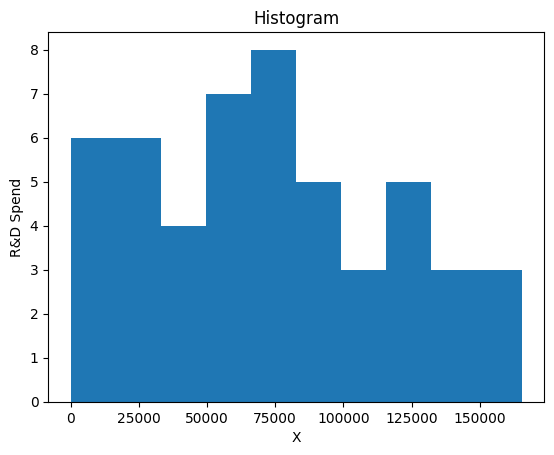

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

#create a histogram for R&D
plt.hist(df['R&D Spend'],bins=10)
#plt.xticks(range(len(df)),[str(i) for i in range(len(df))])
plt.xlabel("X")
plt.ylabel('R&D Spend')
plt.title('Histogram')
plt.show()

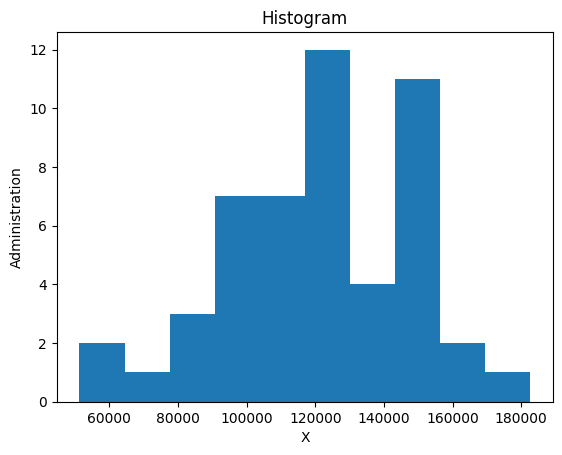

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

#create a histogram for R&D
plt.hist(df['Administration'])
#plt.xticks(range(len(df)),[str(i) for i in range(len(df))])
plt.xlabel("X")
plt.ylabel('Administration')
plt.title('Histogram')
plt.show()

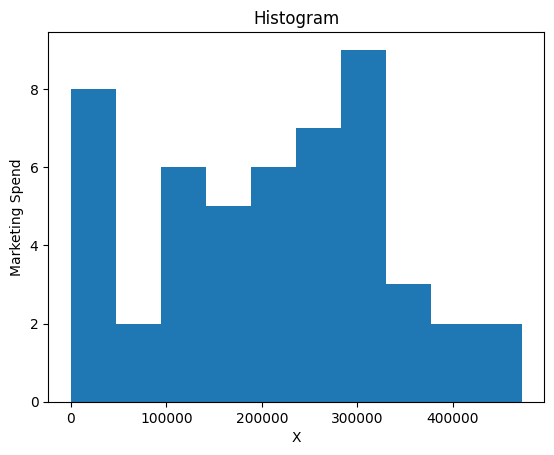

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

#create a histogram for R&D
plt.hist(df['Marketing Spend'])
#plt.xticks(range(len(df)),[str(i) for i in range(len(df))])
plt.xlabel("X")
plt.ylabel('Marketing Spend')
plt.title('Histogram')
plt.show()

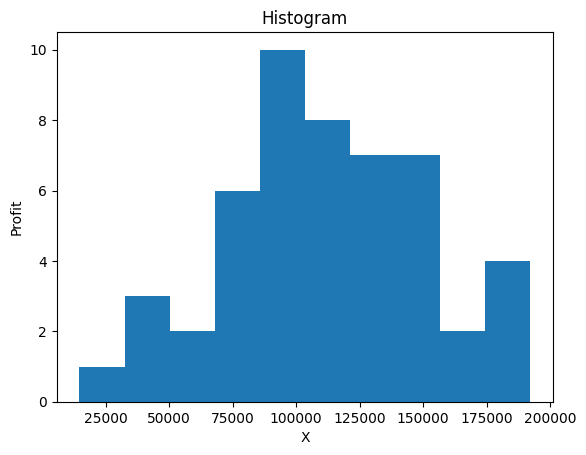

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

#create a histogram for R&D
plt.hist(df['Profit'])
#plt.xticks(range(len(df)),[str(i) for i in range(len(df))])
plt.xlabel("X")
plt.ylabel('Profit')
plt.title('Histogram')
plt.show()

In [30]:
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Assuming you have the dataset stored in a DataFrame called 'data'
df=pd.read_excel(dataset)

# X=df[['R&D Spend','Administration','Marketing Spend','State']]
# y=df['Profit']

# # One-hot encode the 'State' column
# column_transformer = ColumnTransformer([('encoder', OneHotEncoder(), [3])], remainder='passthrough')
# X_encoded = column_transformer.fit_transform(X)

states=df['State']

# Perform label encoding on the 'State' column
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(states)


print(df)

    R&D Spend  Administration  Marketing Spend  State     Profit
0   165349.20       136897.80        471784.10      2  192261.83
1   162597.70       151377.59        443898.53      0  191792.06
2   153441.51       101145.55        407934.54      1  191050.39
3   144372.41       118671.85        383199.62      2  182901.99
4   142107.34        91391.77        366168.42      1  166187.94
5   131876.90        99814.71        362861.36      2  156991.12
6   134615.46       147198.87        127716.82      0  156122.51
7   130298.13       145530.06        323876.68      1  155752.60
8   120542.52       148718.95        311613.29      2  152211.77
9   123334.88       108679.17        304981.62      0  149759.96
10  101913.08       110594.11        229160.95      1  146121.95
11  100671.96        91790.61        249744.55      0  144259.40
12   93863.75       127320.38        249839.44      1  141585.52
13   91992.39       135495.07        252664.93      0  134307.35
14  119943.24       15654

<Axes: >

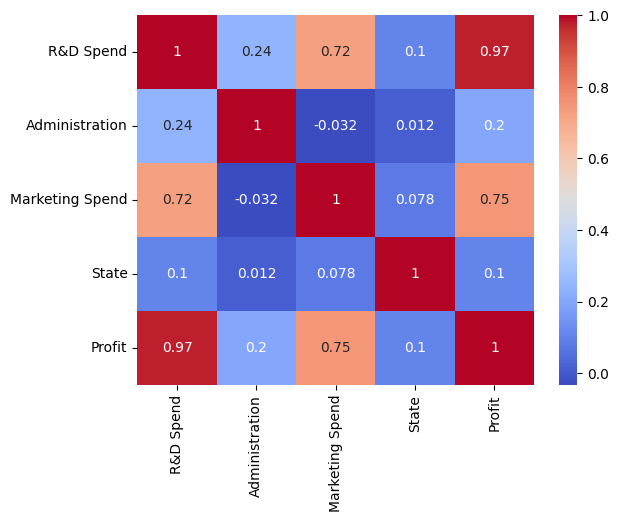

In [31]:
#Selecting the numerical columns for correlation analysis
numerical_columns = ["R&D Spend", "Administration", "Marketing Spend","State","Profit"]
numerical_data = df[numerical_columns]

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Visualizing the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

In [32]:
#This will give you a pandas Series object containing the correlation coefficients between "Profit" and each of the other variables.
profit_correlations = correlation_matrix["Profit"]


In [33]:
#This will give you a sorted Series object with the variables ordered based on their correlation coefficients with "Profit."
profit_correlations_sorted = profit_correlations.sort_values(ascending=False)


In [34]:
print(profit_correlations_sorted)


Profit             1.000000
R&D Spend          0.972900
Marketing Spend    0.747766
Administration     0.200717
State              0.101796
Name: Profit, dtype: float64


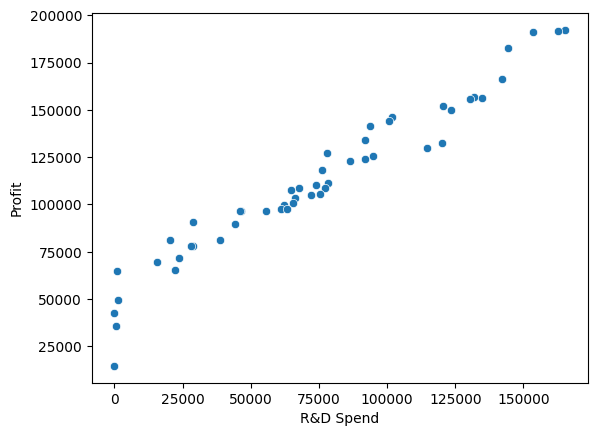

In [35]:
sns.scatterplot(x="R&D Spend", y="Profit", data=df)
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()


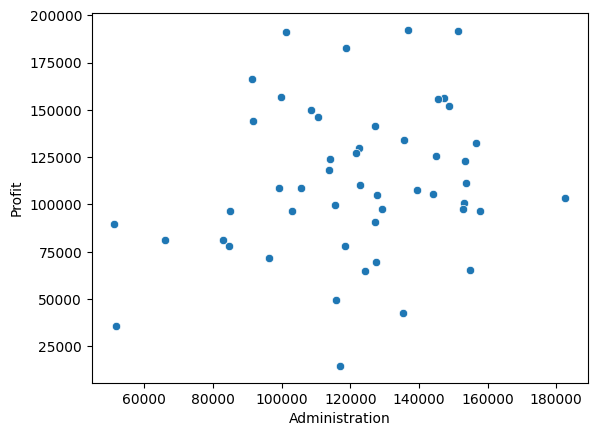

In [36]:
sns.scatterplot(x="Administration", y="Profit", data=df)
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.show()

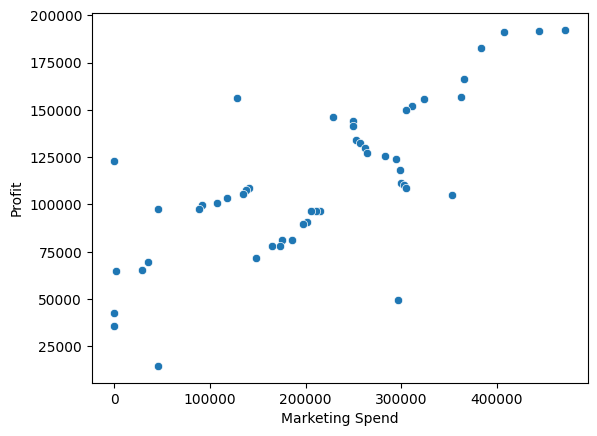

In [37]:
sns.scatterplot(x="Marketing Spend", y="Profit", data=df)
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.show()

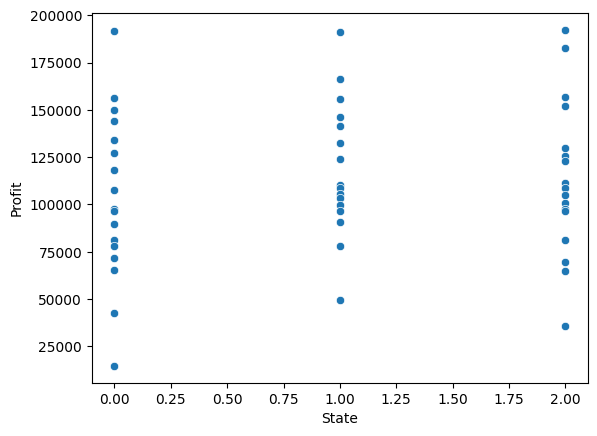

In [38]:
sns.scatterplot(x="State", y="Profit", data=df)
plt.xlabel("State")
plt.ylabel("Profit")
plt.show()

In [40]:
#splitting the data
import pandas as pd
from sklearn.model_selection import train_test_split

X = df[['R&D Spend', 'Administration', 'Marketing Spend','State']]
y = df['Profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [20]:
type(X)

pandas.core.frame.DataFrame

In [41]:
X_train

,R&D Spend,Administration,Marketing Spend,State
18,91749.16,114175.79,294919.57,1
5,131876.90,99814.71,362861.36,2
12,93863.75,127320.38,249839.44,1
17,94657.16,145077.58,282574.31,2
29,65605.48,153032.06,107138.38,2
6,134615.46,147198.87,127716.82,0
44,22177.74,154806.14,28334.72,0
0,165349.20,136897.80,471784.10,2
45,1000.23,124153.04,1903.93,2
3,144372.41,118671.85,383199.62,2


In [42]:
X_test

,R&D Spend,Administration,Marketing Spend,State
28,66051.52,182645.56,118148.20,1
24,77044.01,99281.34,140574.81,2
33,55493.95,103057.49,214634.81,1
2,153441.51,101145.55,407934.54,1
7,130298.13,145530.06,323876.68,1
35,46014.02,85047.44,205517.64,2
46,1315.46,115816.21,297114.46,1
48,542.05,51743.15,0.00,2
37,44069.95,51283.14,197029.42,0
14,119943.24,156547.42,256512.92,1


In [43]:
y_train

18    124266.90
5     156991.12
12    141585.52
17    125370.37
29    101004.64
6     156122.51
44     65200.33
0     192261.83
45     64926.08
3     182901.99
41     77798.83
22    110352.25
11    144259.40
40     78239.91
31     97483.56
21    111313.02
19    122776.86
49     14681.40
1     191792.06
34     96712.80
13    134307.35
25    107404.34
15    129917.04
4     166187.94
32     97427.84
39     81005.76
23    108733.99
42     71498.49
30     99937.59
27    105008.31
43     69758.98
36     90708.19
38     81229.06
8     152211.77
26    105733.54
9     149759.96
47     42559.73
10    146121.95
20    118474.03
16    126992.93
Name: Profit, dtype: float64

In [44]:
y_test

28    103282.38
24    108552.04
33     96778.92
2     191050.39
7     155752.60
35     96479.51
46     49490.75
48     35673.41
37     89949.14
14    132602.65
Name: Profit, dtype: float64

In [45]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

In [46]:
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# The model.coef_ attribute will provide the coefficients of the features (predictor variables) in the same order as they were specified in X_train. The model.intercept_ attribute will give you the intercept or bias term of the linear regression model.


Coefficients: [ 8.01334612e-01 -4.05685235e-02  2.26603445e-02  6.24882675e+02]
Intercept: 53287.59194917287


In [47]:
#3rd trial
coefficients

array([ 8.01334612e-01, -4.05685235e-02,  2.26603445e-02,  6.24882675e+02])

In [ ]:
#2nd trial
coefficients

array([ 0.78637828, -0.01838907,  0.03341648])

In [ ]:
#1st trial
coefficients

array([ 0.83102615, -0.04356678,  0.01952133])

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Lower values of mean squared error indicate better model performance, while higher values of R-squared indicate a better fit of the model to the data.

Mean Squared Error: 80507391.45591028
R-squared: 0.9576341485596774


In [49]:
#Calculating error residual
err_r=y_test-y_pred
print(err_r)
# Square each residual and sum them up
sum_squared_residuals = sum(err_r**2)

print(sum_squared_residuals)
print(mse)


28     1172.918010
24    -6881.125397
33    -2285.586045
2      9039.310928
7     -4007.493541
35     3862.674383
46    -7510.071652
48   -17199.167531
37    -1037.501495
14   -16886.267745
Name: Profit, dtype: float64
805073914.5591028
80507391.45591028


In [ ]:
#By following these steps, you can develop and train a multivariable linear regression model using the coefficient data and evaluate its performance for predicting profitability based on the predictor variables.

In [ ]:
#first trial
ReDev=int(input("Give R&D_Spend"))
Administration=int(input("Give Administration Spend"))
Marketing_Spend=int(input("Give Marketing_Spend"))
Profit=intercept+(coefficients[0]*ReDev)+(coefficients[1]*Administration)+(coefficients[2]*Marketing_Spend)
Profit

Give R&D_Spend165349
Give Administration Spend136897
Give Marketing_Spend471784


194367.30527792635

In [ ]:
#second trial
ReDev=int(input("Give R&D_Spend"))
Administration=int(input("Give Administration Spend"))
Marketing_Spend=int(input("Give Marketing_Spend"))
Profit=intercept+(coefficients[0]*ReDev)+(coefficients[1]*Administration)+(coefficients[2]*Marketing_Spend)
Profit

Give R&D_Spend165349
Give Administration Spend136897
Give Marketing_Spend471784


192363.22582747988

In [50]:
#3rd trial
ReDev=int(input("Give R&D_Spend"))
Administration=int(input("Give Administration Spend"))
Marketing_Spend=int(input("Give Marketing_Spend"))
State=int(input("Give a number for state (California=0,Florida=1,New York=2)"))
Profit=intercept+(coefficients[0]*ReDev)+(coefficients[1]*Administration)+(coefficients[2]*Marketing_Spend)+(coefficients[3]*State)
Profit

Give R&D_Spend165349
Give Administration Spend136897
Give Marketing_Spend471784
Give a number for state (California=0,Florida=1,New York=2)2


192174.31284751624